In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, solve_ivp

G = 6.6743*10**(-11) #m^3/kg/s^2
g = 9.81 #m/s^2
Mearth = 5.972*10**24 #kg
Mmoon = 7.35*10**22 #kg
Rearth = 6378.1*10**3 #m
Rmoon = 1738.1*10**3#m
RotE = 7.272*10**(-5) #rad/s


1.1 The time it takes for the object to hit the bottom of the shaft is 28.574165529004855 seconds
1.4 The fall time analytically is [28.57416553] seconds. This is approximately equal to the solution found using the freefall equations


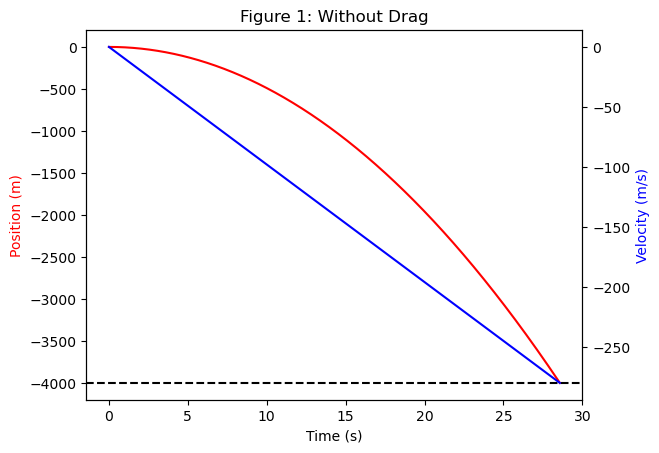

In [2]:
#Part 1: The Ideal Case

#1: W/out drag

def freefall(dx, M, v0, R):
    ag = (G*M)/(R**2)
    coefficients = [0.5*ag, v0, -dx]
    return np.roots(coefficients)

falltime = freefall(4*10**3, Mearth, 0, Rearth)[0]
print(f"1.1 The time it takes for the object to hit the bottom of the shaft is {falltime} seconds")

#2: def coupled eq

def wdrag(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -G*Mearth/(Rearth**2) - alpha*(v**gamma)
    return np.concatenate(([dydt],[dvdt]))

#3: Solving

alpha = 0
gamma = 2
t0,tf,n = 0, falltime, 1000
teval = np.linspace(t0,tf,n)
ics = [0,0]

soln = solve_ivp(fun = wdrag, t_span = (t0,tf), y0 = ics, t_eval = teval)
t = soln.t
y = soln.y[0]
v = soln.y[1]

fig1, ax1 = plt.subplots()
ax11 = ax1.twinx()
ax1.plot(t,y, '-r', label = 'Position (m)')
ax11.plot(t,v, '-b', label = 'Velocity (m/s)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (m)', color = 'red')
ax11.set_ylabel('Velocity (m/s)', color = 'blue')
ax1.axhline(y = -4000, color = 'black', linestyle = 'dashed')
ax1.set_title("Figure 1: Without Drag")
fig1.savefig("Figure1")

#4: Events
def stop(t, ics):
    y = ics[0]
    v = ics[1]
    return 4000+y

t0,tf1,n = 0, 32, 1000
teval1 = np.linspace(t0,tf,n)

soln1 = solve_ivp(fun = wdrag, t_span = (t0,tf1), y0 = ics, t_eval = teval1, events = stop)
falltimeanalytic = soln1.t_events[0]
print(f"1.4 The fall time analytically is {falltimeanalytic} seconds. This is approximately equal to the solution found using the freefall equations")

The fall time with a varying gravitational acceleration is [28.57565909] seconds, while with a constant acceleration it is 28.574165529004855 seconds. As we can see, varying the gravitational acceleration results in a fall time that is [-5.22695226e-05] percent larger. This is because the position y and the gravitational acceleration are inversely proportional, meaning over time the velocity, and therefore position will be smaller.


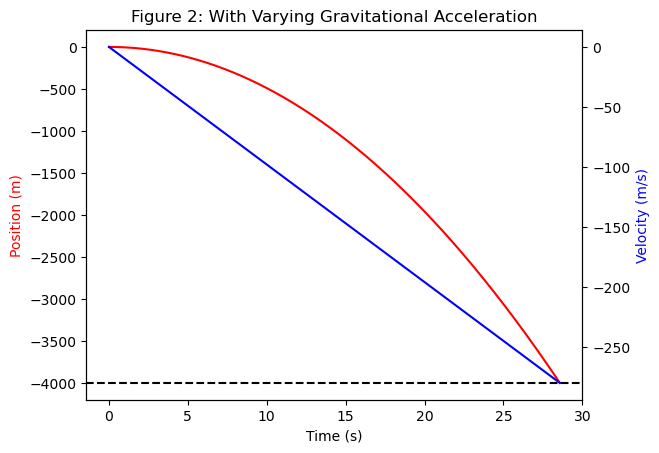

In [33]:
#Part 2: Including Drag and A Variable g

#1: g(r) and replotting
alpha = 0
def g(r):
    g0 = G*Mearth/(Rearth**2)
    return g0*((Rearth-abs(r))/Rearth)

def varyg(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -g(y) + alpha*(np.abs(v)**gamma)
    return np.concatenate(([dydt],[dvdt]))

soln2 = solve_ivp(fun = varyg, t_span = (t0,tf), y0 = ics, t_eval = teval)
t2 = soln2.t
y2 = soln2.y[0]
v2 = soln2.y[1]

fig2, ax2 = plt.subplots()
ax21 = ax2.twinx()
ax2.plot(t2,y2, '-r')
ax21.plot(t2,v2, '-b')
ax2.axhline(y = -4000, linestyle = 'dashed', color = 'black')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Position (m)', color = 'red')
ax21.set_ylabel('Velocity (m/s)', color = 'blue')
ax2.set_title('Figure 2: With Varying Gravitational Acceleration')
fig2.savefig("Figure2")

#2: Fall time

soln3 = solve_ivp(fun = varyg, t_span = (t0,tf1), y0 = ics, t_eval = teval1, events = stop)
falltime3 = soln3.t_events[0]
print(f"The fall time with a varying gravitational acceleration is {falltime3} seconds, while with a constant acceleration it is {falltime} seconds. As we can see, varying the gravitational acceleration results in a fall time that is {(falltime-falltime3)/falltime} percent larger. This is because the position y and the gravitational acceleration are inversely proportional, meaning over time the velocity, and therefore position will be smaller.")



To find the correct drag value, we will run a for loop over many alphas, and plot alpha against the maximum velocity
On the plot, we can see that the eighth point seems to be the correct alpha, resulting in a terminal velocity of ~50m/s. This would be an alpha of 0.00415. We will round this to 0.004.


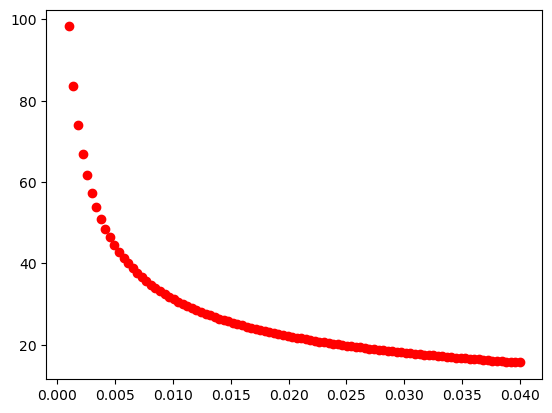

In [4]:
#3: Calibrating Drag
print(f"To find the correct drag value, we will run a for loop over many alphas, and plot alpha against the maximum velocity")

fig3, ax3 = plt.subplots()
ax3.set_xlabel('Alpha')
ax3.set_y
alphas = np.linspace(0.001,0.04,100)
for i in alphas:
    alpha = i
    soln5 = solve_ivp(fun = varyg, t_span = (t0,tf), y0 = ics, t_eval = teval)
    v5 = soln5.y[1]
    term = np.abs(v5).max()
    ax3.plot(i, term, 'or')
print(f"On the plot, we can see that the eighth point seems to be the correct alpha, resulting in a terminal velocity of ~50m/s. This would be an alpha of {alphas[8]:.5f}. We will round this to 0.004.")
alpha = 0.004


Since we drop the mass from the center, it only needs to move ~2.5m in any direction in order to hit the wall. We can see on the graph that the transverse position exceeds that threshold at ~2500m down. Therefore, the test mass will hit the wall before it hits the bottom of the shaft.
We can see that turning on drag triples the fall time, and increases the transverse travel by 500%. With drag, the test mass hits the wall somewhere between 1000 and 2000 meters.


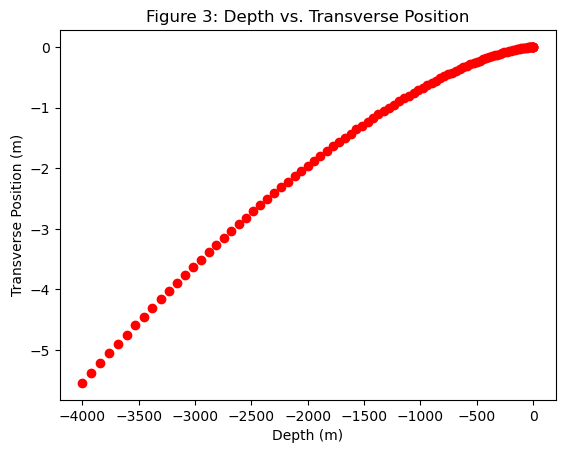

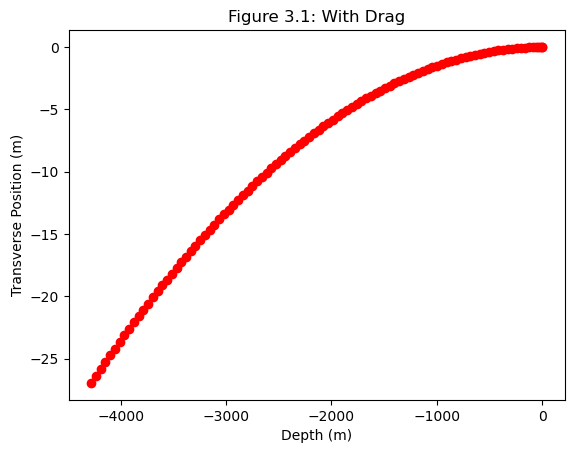

In [5]:
#Part 3: The Coriolis Force

#1: Defining the force
def wcoriolis(t, s):
    r = s[0:3]
    v = s[3:6]
    drdt = v
    dvydt = [-g(r[1]) + alpha*(np.abs(v[1])**gamma) - 2*RotE*v[0]]
    dvxdt = [2*RotE*v[1]]
    dvzdt = [0]
    return np.concatenate((drdt, dvxdt, dvydt, dvzdt))

alpha = 0 

#2: plotting

#tspan 
t06, tf6, n6 = 0,falltime,100
teval6 = np.linspace(t06, tf6, n6)

#initial conditions:
ics6 = [0,0,0,0,0,0]

soln6 = solve_ivp(fun = wcoriolis, t_span = (t06,tf6), y0 = ics6, t_eval = teval6)
ry = soln6.y[1]
rx = soln6.y[0]

fig6, ax6 = plt.subplots()
ax6.plot(ry,rx, 'or')
ax6.set_xlabel('Depth (m)')
ax6.set_ylabel('Transverse Position (m)')
ax6.set_title('Figure 3: Depth vs. Transverse Position')

#3: evaluation
print("Since we drop the mass from the center, it only needs to move ~2.5m in any direction in order to hit the wall. We can see on the graph that the transverse position exceeds that threshold at ~2500m down. Therefore, the test mass will hit the wall before it hits the bottom of the shaft.")

#4: w/drag
alpha = 0.004

t07, tf7, n7 = 0, 90, 100
teval7 = np.linspace(t07,tf7,n7)

soln7 = solve_ivp(fun = wcoriolis, t_span = (t07,tf7), y0 = ics6, t_eval = teval7)
ry7 = soln7.y[1]
rx7 = soln7.y[0]

fig7, ax7 = plt.subplots()
ax7.plot(ry7,rx7, 'or')
ax7.set_xlabel('Depth (m)')
ax7.set_ylabel('Transverse Position (m)')
ax7.set_title('Figure 3.1: With Drag')

print('We can see that turning on drag triples the fall time, and increases the transverse travel by 500%. With drag, the test mass hits the wall somewhere between 1000 and 2000 meters.')

We see that the test mas is able to fall through the entirety of the earth. At the time when the object passes the center of the earth, at -6378100.0 meters, we see that the velocity has a critical point, and meaning the acceleration is 0. After this, we see that the velocity begins increasing again. We see the position graph has an inflection point there, and a critical point when it hits -12756200.0 meters. At this time, the velocity returns to 0. We can see from this graph that both the position and velocity will be periodic.
It will take 1267.228 seconds for the test mass to reach the center of the earth. At this time, the velocity is -7905.676 m/s.
Since the motion is periodic, the time to the other side of the Earth would be 2 times the time to the center. This would be 2534.456457746172 seconds.
The orbital period for an object orbiting at the earth's surface would be 5069.371 seconds. This is approximately double the time we found for the object to fall through the entire earth

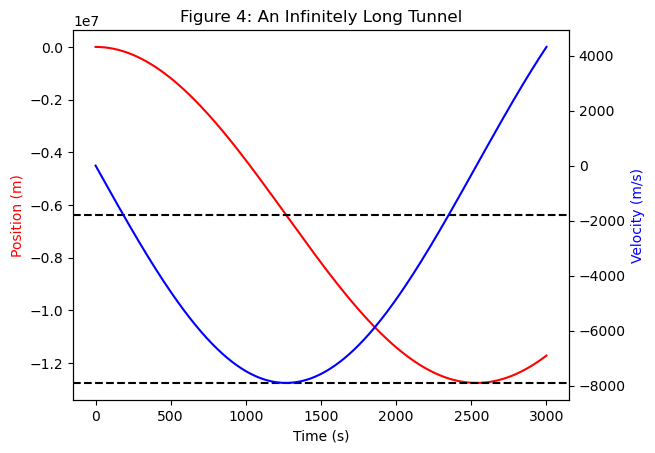

In [68]:
#Part 4: An Infinitely Long Tunnel

#Since we are neglecting the coriolis force, we will use the previously defined "varyg" function. 
alpha = 0

#tspan 
t08,tf8,n8 = 0,3000,1000
teval8 = np.linspace(t08,tf8,n8)

#ics
ics8 = [0,0]

soln8 = solve_ivp(fun = varyg, t_span = (t08, tf8), y0 = ics8, t_eval = teval8)
t8 = soln8.t
y8 = soln8.y[0]
v8 = soln8.y[1]

fig8, ax8 = plt.subplots()
ax81 = ax8.twinx()
ax8.plot(t8,y8, '-r')
ax81.plot(t8,v8,'-b')
ax8.axhline(-Rearth, linestyle = 'dashed', color = 'black')
ax8.axhline(-2*Rearth, linestyle = 'dashed', color = 'black')
ax8.set_xlabel('Time (s)')
ax8.set_ylabel('Position (m)', color = 'red')
ax81.set_ylabel('Velocity (m/s)', color = 'blue')
ax8.set_title('Figure 4: An Infinitely Long Tunnel')
print(f"We see that the test mas is able to fall through the entirety of the earth. At the time when the object passes the center of the earth, at -{Rearth} meters, we see that the velocity has a critical point, and meaning the acceleration is 0. After this, we see that the velocity begins increasing again. We see the position graph has an inflection point there, and a critical point when it hits -{2*Rearth} meters. At this time, the velocity returns to 0. We can see from this graph that both the position and velocity will be periodic.")

#2: Events
def center(t, s):
    return Rearth - np.abs(s[0])

soln81 = solve_ivp(fun = varyg, t_span = (t08, tf8), y0 = ics8, t_eval = teval8, events = center)
ttocenter1 = soln81.t_events[0][0]
vatcenter1 = soln81.y_events[0][0][1]
print(f"It will take {ttocenter1:.3f} seconds for the test mass to reach the center of the earth. At this time, the velocity is {vatcenter1:.3f} m/s.")
print(f"Since the motion is periodic, the time to the other side of the Earth would be 2 times the time to the center. This would be {2*ttocenter1} seconds.")

#3: Vs orbital period at R = Rearth

vorbit = np.sqrt(G*Mearth/(Rearth))
periodor= 2*np.pi*Rearth/vorbit
print(f"The orbital period for an object orbiting at the earth's surface would be {periodor:.3f} seconds. This is approximately double the time we found for the object to fall through the entire earth.")


In [ ]:
#5: A non-uniform Earth